In [13]:
%run Load_Data.ipynb import *
from Process_Features import *

Using matplotlib backend: Qt5Agg


In [15]:
RESP_Dataframe = Process_RESP(CH3,fs,16)
RESP_Dataframe

,Mean_RSP_Rate,Minimum_RSP_Rate,Maximum_RSP_Rate,STD_RSP_Rate,Mean_RSP_Amplitude,Minimum_RSP_Amplitude,Maximum_RSP_Amplitude,STD_RSP_Amplitude,RRV_RMSSD,RRV_MeanBB,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,12.056669,5.046257,28.037383,3.252259,0.63506,0.011015,1.406026,0.259646,2685.223471,5605.525,...,53.405673,NaN,NaN,1900.905991,2042.201689,1.074331,1.342097,1.774309,0.649386,0.454214


In [2]:
data = CH3
resp_Dataframe = Process_RESP(data,fs,16)

In [3]:
resp_Dataframe

,Mean_RSP_Rate,Minimum_RSP_Rate,Maximum_RSP_Rate,STD_RSP_Rate,Mean_RSP_Amplitude,Minimum_RSP_Amplitude,Maximum_RSP_Amplitude,STD_RSP_Amplitude,RRV_RMSSD,RRV_MeanBB,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,16.040586,5.845105,27.198549,3.82895,0.201537,0.005836,1.065333,0.139265,1491.053898,3912.050667,...,27.757511,NaN,NaN,1055.038856,1464.392215,1.387998,1.219576,1.007027,0.883648,0.551944


In [4]:
resp = np.array(CH3)
resp = resp.astype(float)
time=np.array(bsnb.generate_time(resp,fs))

In [5]:
len(CH3)

2944192

In [6]:
signals,info = nk.rsp_process(resp,fs,method='biosppy')
signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0,1.54678,-0.018017,0.207966,15.867612,NaN,0.0,0,0
1,1.54962,-0.018083,0.207966,15.867612,NaN,0.0,0,0
2,1.55534,-0.018149,0.207966,15.867612,NaN,0.0,0,0
3,1.55214,-0.018215,0.207966,15.867612,NaN,0.0,0,0
4,1.54861,-0.018280,0.207966,15.867612,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
2944187,1.60922,0.000009,0.212118,15.243902,NaN,0.0,0,0
2944188,1.60931,0.000009,0.212118,15.243902,NaN,0.0,0,0
2944189,1.61064,0.000009,0.212118,15.243902,NaN,0.0,0,0
2944190,1.60876,0.000009,0.212118,15.243902,NaN,0.0,0,0


In [7]:
np.mean(signals["RSP_Rate"])

16.040585577576596

In [8]:
info,peak_signals = nk.rsp_peaks(signals["RSP_Clean"])

In [9]:
rrv_dataframe = nk.rsp_rrv(signals["RSP_Rate"],peaks=peak_signals["RSP_Troughs"])
rrv_dataframe

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_NN50,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,1491.053898,3912.050667,1276.234999,1492.050259,0.326232,0.381144,3425.0,538.1838,0.157134,680.0,...,27.757511,NaN,NaN,1055.038856,1464.392215,1.387998,1.219576,1.007027,0.883648,0.551944


In [10]:
rrv_dataframe.insert(0,"AVG Resp Rate",np.mean(signals["RSP_Rate"]),True)
rrv_dataframe.insert(0,"Min Resp Rate",np.mean(signals["RSP_Rate"]),True)
rrv_dataframe

,Min Resp Rate,AVG Resp Rate,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,16.040586,16.040586,1491.053898,3912.050667,1276.234999,1492.050259,0.326232,0.381144,3425.0,538.1838,...,27.757511,NaN,NaN,1055.038856,1464.392215,1.387998,1.219576,1.007027,0.883648,0.551944


In [11]:
rrv_dataframe.columns

Index(['Min Resp Rate', 'AVG Resp Rate', 'RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB',
       'RRV_SDSD', 'RRV_CVBB', 'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB',
       'RRV_MCVBB', 'RRV_NN50', 'RRV_NN20', 'RRV_pNN50', 'RRV_pNN20',
       'RRV_VLF', 'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn',
       'RRV_SD1', 'RRV_SD2', 'RRV_SD2SD1', 'RRV_ApEn', 'RRV_SampEn',
       'RRV_DFA_1', 'RRV_DFA_2'],
      dtype='object')

Using matplotlib backend: Qt5Agg


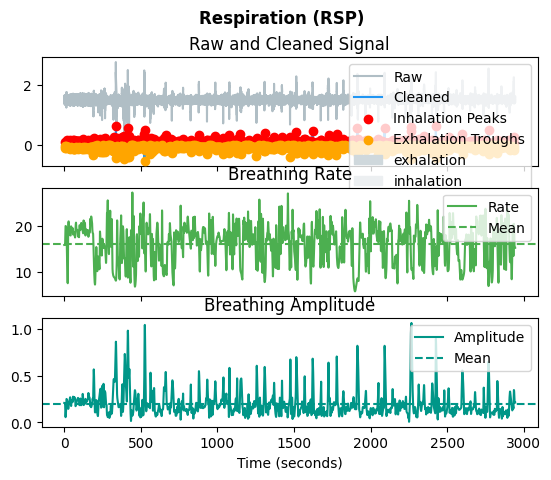

In [12]:
%matplotlib
nk.rsp_plot(signals,fs)